<h1><b> 1. LOGISTIC REGRESSION </b></h1>
<br><br>
<b>ASSUMPTIONS</b>

* ASSUMPTION OF MULTICOLLINEARITY
* ASSUMPTIONS OF NO OUTLIERS
* The relationship between the independent variables and the log odds of the dependent variable is linear.
* The dataset should have an adequate number of observations for reliable estimation.

#<ul><b> LOADING THE DATASET

In [2]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount("/content/drive")
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df=pd.read_csv("/content/drive/MyDrive/CREDIT CARD APPROVAL PROJECT/10_feature_extraction.csv")
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,1,0,1,1,0,202500.0,406597.5,24700.5,6,3,...,0.139376,1,0,0,0.0,0.0,0.0,0.0,1.0,8
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,2,...,0.586819,1,0,0,0.0,0.0,0.0,0.0,0.0,3
2,0,1,1,1,0,67500.0,135000.0,6750.0,6,3,...,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,8
3,0,0,0,1,0,135000.0,312682.5,29686.5,6,3,...,0.519243,1,0,0,0.0,0.0,0.0,0.0,0.5,8
4,0,0,1,1,0,121500.0,513000.0,21865.5,6,3,...,0.581112,0,0,1,0.0,0.0,0.0,0.0,0.0,3


# <b><ul> ASSUMPTIONS CHECKING FOR LOGISTIC REGRESSION

## <ul> MULTICOLLINERAITY CHECKING

In [4]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

X=df.drop("TARGET",axis=1)
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by='VIF')

,Feature,VIF
37,AMT_REQ_CREDIT_BUREAU_HOUR,1.000678
25,WEEKDAY_APPR_PROCESS_START,1.001483
38,AMT_REQ_CREDIT_BUREAU_WEEK,1.002115
40,AMT_REQ_CREDIT_BUREAU_QRT,1.009406
8,NAME_TYPE_SUITE,1.014274
39,AMT_REQ_CREDIT_BUREAU_MON,1.014874
41,AMT_REQ_CREDIT_BUREAU_YEAR,1.043873
12,NAME_HOUSING_TYPE,1.078811
3,FLAG_OWN_REALTY,1.097467
33,EXT_SOURCE_3,1.103391


In [5]:
df[["REGION_RATING_CLIENT_W_CITY","REGION_RATING_CLIENT","CNT_CHILDREN","CNT_FAM_MEMBERS"]].corr()

,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,CNT_CHILDREN,CNT_FAM_MEMBERS
REGION_RATING_CLIENT_W_CITY,1.000000,0.950718,0.025661,0.031394
REGION_RATING_CLIENT,0.950718,1.000000,0.026414,0.030224
CNT_CHILDREN,0.025661,0.026414,1.000000,0.874440
CNT_FAM_MEMBERS,0.031394,0.030224,0.874440,1.000000


In [6]:
X=df.drop("CNT_FAM_MEMBERS",axis=1)
X = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif_data.sort_values(by='VIF')

,Feature,VIF
37,AMT_REQ_CREDIT_BUREAU_HOUR,1.000678
25,WEEKDAY_APPR_PROCESS_START,1.001485
38,AMT_REQ_CREDIT_BUREAU_WEEK,1.002112
40,AMT_REQ_CREDIT_BUREAU_QRT,1.009422
9,NAME_TYPE_SUITE,1.012597
39,AMT_REQ_CREDIT_BUREAU_MON,1.014879
41,AMT_REQ_CREDIT_BUREAU_YEAR,1.043707
1,TARGET,1.059477
12,NAME_FAMILY_STATUS,1.072984
13,NAME_HOUSING_TYPE,1.077745


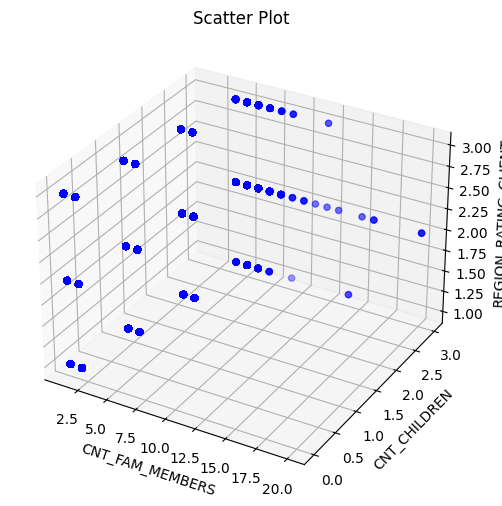

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
ax.scatter(df['CNT_FAM_MEMBERS'], df['CNT_CHILDREN'], df["REGION_RATING_CLIENT"], c='blue', marker='o')

# Set labels
ax.set_xlabel("CNT_FAM_MEMBERS")
ax.set_ylabel('CNT_CHILDREN')
ax.set_zlabel("REGION_RATING_CLIENT")

# Set title
ax.set_title('Scatter Plot')

plt.show()


## <b><ul> MODEL 1- LOGISTIC REGRESSION WITH CLASS WEIGHTS

In [8]:
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,NAME_TYPE_SUITE,NAME_INCOME_TYPE,...,EXT_SOURCE_3,FLAG_DOCUMENT_3,FLAG_DOCUMENT_6,FLAG_DOCUMENT_8,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR,OCCUPATION_TYPE1
0,1,0,1,1,0,202500.0,406597.5,24700.5,6,3,...,0.139376,1,0,0,0.0,0.0,0.0,0.0,1.0,8
1,0,0,0,0,0,270000.0,1293502.5,35698.5,1,2,...,0.586819,1,0,0,0.0,0.0,0.0,0.0,0.0,3
2,0,1,1,1,0,67500.0,135000.0,6750.0,6,3,...,0.729567,0,0,0,0.0,0.0,0.0,0.0,0.0,8
3,0,0,0,1,0,135000.0,312682.5,29686.5,6,3,...,0.519243,1,0,0,0.0,0.0,0.0,0.0,0.5,8
4,0,0,1,1,0,121500.0,513000.0,21865.5,6,3,...,0.581112,0,0,1,0.0,0.0,0.0,0.0,0.0,3


In [9]:
df=df.drop(columns=["CNT_FAM_MEMBERS"],axis=1)

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix


X=df.drop("TARGET",axis=1)
y=df["TARGET"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(class_weight='balanced', random_state=42)

model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))




Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.62      0.75     55850
           1       0.09      0.44      0.15      4940

    accuracy                           0.61     60790
   macro avg       0.51      0.53      0.45     60790
weighted avg       0.86      0.61      0.70     60790



In [11]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[34890, 20960],
       [ 2788,  2152]])

In [12]:
TN = conf_matrix[0, 0]  # True Negatives
FP = conf_matrix[0, 1]  # False Positives

# Calculate True Negative Rate (TNR)
TNR = TN / (TN + FP)

print("True Negative Rate (TNR):", TNR)

True Negative Rate (TNR): 0.624709042076992


In [25]:
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
NPV = TN / (TN + FN)

# Calculate F1 Score
f1_score = 2 * (precision * NPV) / (precision + NPV)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)

# Calculate False Negative Rate (FNR)
FNR = FN / (FN + TP)

TPR = TP / (TP + FN)

# Display the True Positive Rate

# Display the metrics

print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", precision)
print("Negative Predictive Value (NPV):", NPV)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

True Positive Rate (TPR): 0.4240890688259109
True Negative Rate (TNR): 0.624709042076992
Precision: 0.09086965950986771
Negative Predictive Value (NPV): 0.9246058036305816
F1 Score: 0.16547640510568995
Accuracy: 0.6084059878269452
False Positive Rate (FPR): 0.37529095792300804
False Negative Rate (FNR): 0.5759109311740891


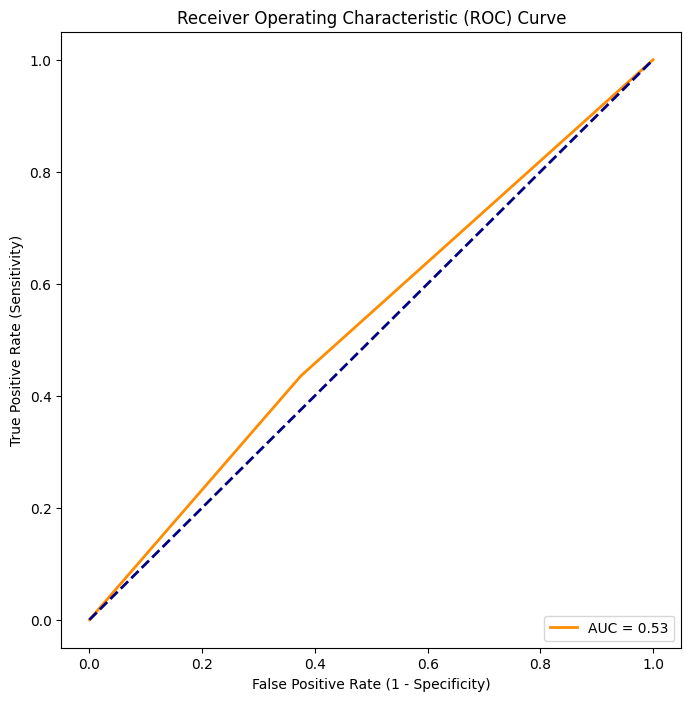

In [23]:
# for test set

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

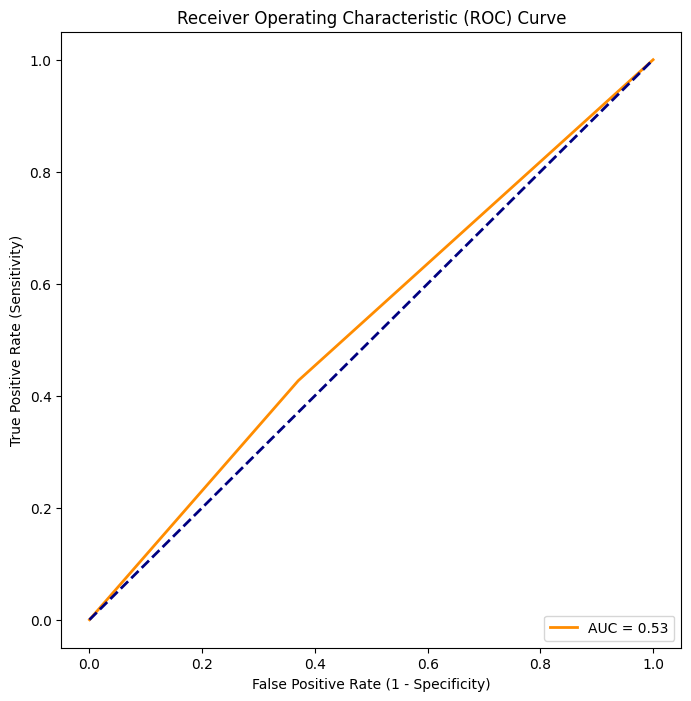

In [24]:
# training Performance

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_pred_train)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [14]:
df.TARGET.value_counts()

0    279416
1     24531
Name: TARGET, dtype: int64

# <b><ul>MODEL 2- LOGISTIC REGRESSION WITH OVERSAMPLING

In [15]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(sampling_strategy=0.3, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)


In [16]:
model = LogisticRegression(class_weight='balanced', random_state=42)

model.fit(X_train_resampled, y_train_resampled)


y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.63      0.75     55850
           1       0.09      0.42      0.15      4940

    accuracy                           0.61     60790
   macro avg       0.51      0.53      0.45     60790
weighted avg       0.86      0.61      0.70     60790



In [17]:
y_pred_train = model.predict(X_train_resampled)

print("Classification Report:")
print(classification_report(y_train_resampled, y_pred_train))

Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.63      0.70    223566
           1       0.26      0.43      0.32     67069

    accuracy                           0.58    290635
   macro avg       0.52      0.53      0.51    290635
weighted avg       0.66      0.58      0.61    290635



In [18]:
TP = conf_matrix[1, 1]  # True Positives
FN = conf_matrix[1, 0]  # False Negatives

# Calculate Precision
precision = TP / (TP + FP)

# Calculate Negative Predictive Value (NPV)
NPV = TN / (TN + FN)

# Calculate F1 Score
f1_score = 2 * (precision * NPV) / (precision + NPV)

# Calculate Accuracy
accuracy = (TP + TN) / (TP + TN + FP + FN)

# Calculate False Positive Rate (FPR)
FPR = FP / (FP + TN)

# Calculate False Negative Rate (FNR)
FNR = FN / (FN + TP)

TPR = TP / (TP + FN)

# Display the True Positive Rate

# Display the metrics

print("True Positive Rate (TPR):", TPR)
print("True Negative Rate (TNR):", TNR)
print("Precision:", precision)
print("Negative Predictive Value (NPV):", NPV)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)
print("False Positive Rate (FPR):", FPR)
print("False Negative Rate (FNR):", FNR)

True Positive Rate (TPR): 0.43562753036437246
True Negative Rate (TNR): 0.624709042076992
Precision: 0.09311180339217723
Negative Predictive Value (NPV): 0.9260045649981421
F1 Score: 0.16920924375408086
Accuracy: 0.6093436420463892
False Positive Rate (FPR): 0.37529095792300804
False Negative Rate (FNR): 0.5643724696356275


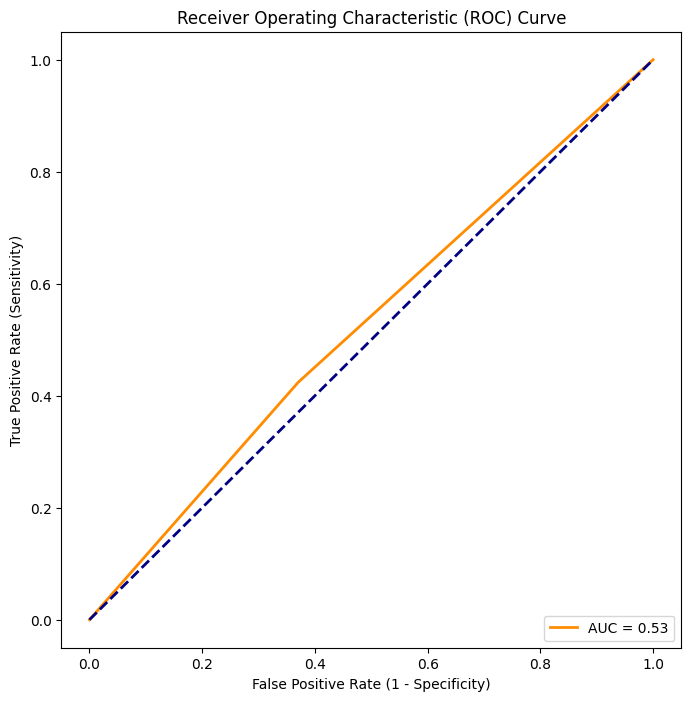

In [19]:
# for test set

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_test,y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

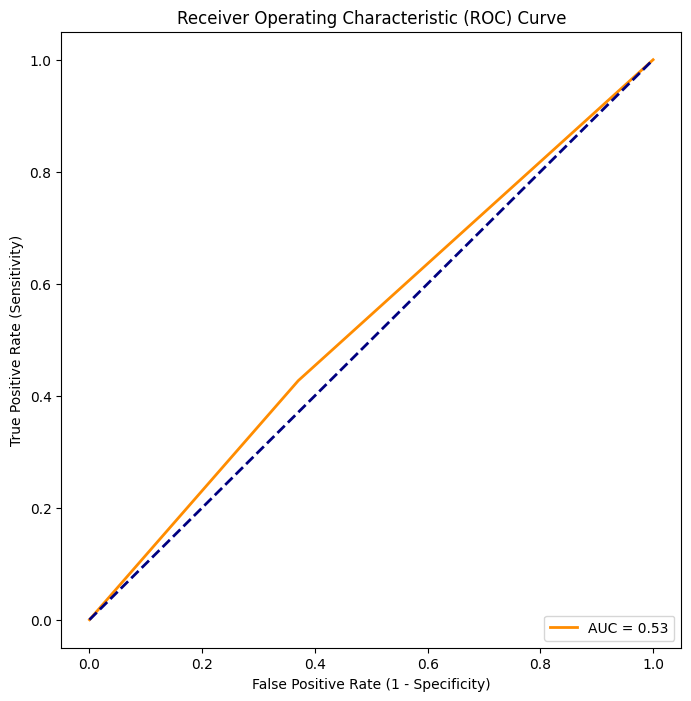

In [20]:
# training Performance

from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

fpr, tpr, thresholds = roc_curve(y_train_resampled, y_pred_train)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [21]:
conf_matrix=confusion_matrix(y_test, y_pred)
conf_matrix

array([[35160, 20690],
       [ 2845,  2095]])